In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from tabulate import tabulate

In [20]:
msft = yf.Ticker("MSFT")

# get historical market data
hist = msft.history(period="1mo")
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-09-14 00:00:00-04:00,339.149994,340.859985,336.570007,338.700012,20267000,0.0,0.0
2023-09-15 00:00:00-04:00,336.920013,337.399994,329.649994,330.220001,37666900,0.0,0.0
2023-09-18 00:00:00-04:00,327.799988,330.399994,326.359985,329.059998,16834200,0.0,0.0
2023-09-19 00:00:00-04:00,326.170013,329.390015,324.510010,328.649994,16505900,0.0,0.0
2023-09-20 00:00:00-04:00,329.510010,329.589996,320.510010,320.769989,21436500,0.0,0.0
2023-09-21 00:00:00-04:00,319.260010,325.350006,315.000000,319.529999,35529500,0.0,0.0
2023-09-22 00:00:00-04:00,321.320007,321.450012,316.149994,317.010010,21447900,0.0,0.0
2023-09-25 00:00:00-04:00,316.589996,317.670013,315.000000,317.540009,17836000,0.0,0.0
2023-09-26 00:00:00-04:00,315.130005,315.880005,310.019989,312.140015,26297600,0.0,0.0


# EDA del dataframe hist

In [18]:
hist.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,22.000000,22.000000,22.000000,22.000000,2.200000e+01,22.0,22.0
mean,323.160908,325.973185,319.752272,323.004095,2.194942e+07,0.0,0.0
std,8.170659,7.585238,7.806514,7.581606,5.358632e+06,0.0,0.0
min,310.989990,314.299988,309.450012,312.140015,1.650590e+07,0.0,0.0
25%,316.559990,319.995010,314.919998,317.142509,1.947848e+07,0.0,0.0
50%,321.074997,327.270004,316.224991,321.284988,2.056355e+07,0.0,0.0
75%,330.305008,330.925003,326.359985,328.957497,2.144505e+07,0.0,0.0
max,339.149994,340.859985,336.570007,338.700012,3.766690e+07,0.0,0.0


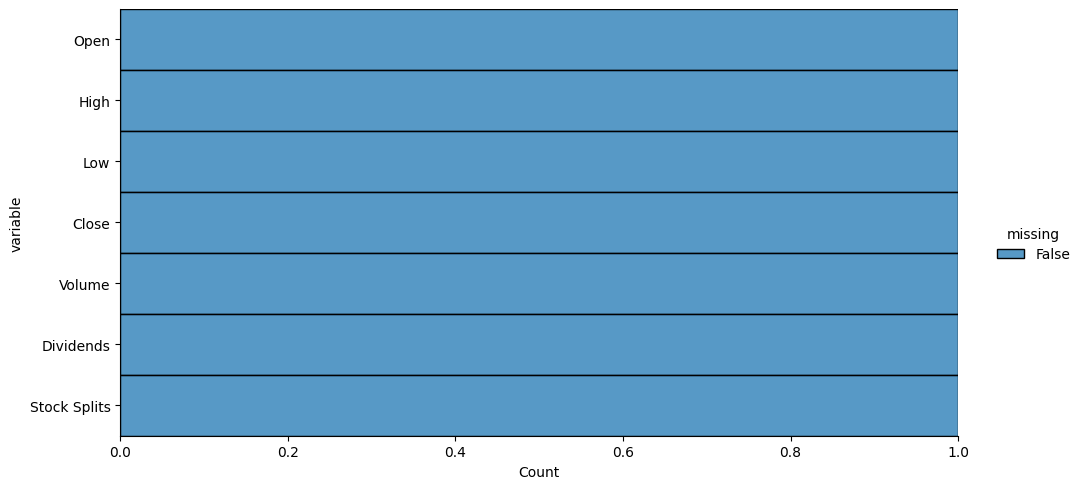

In [26]:
# Este codigo muestra la distubucion de los valores nulos dentro del dataframe en caso de existir
(
    hist
    .isnull()
    .melt(value_name='missing')
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                y='variable',
                hue='missing',
                multiple='fill',
                aspect=2
            )
        )
    )
)

### Analisis de los Holders

In [43]:
# show holders
mh = msft.major_holders
ih = msft.institutional_holders
mh2 = msft.mutualfund_holders

In [37]:
mh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Holder         10 non-null     object        
 1   Shares         10 non-null     int64         
 2   Date Reported  10 non-null     datetime64[ns]
 3   % Out          10 non-null     float64       
 4   Value          10 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 528.0+ bytes


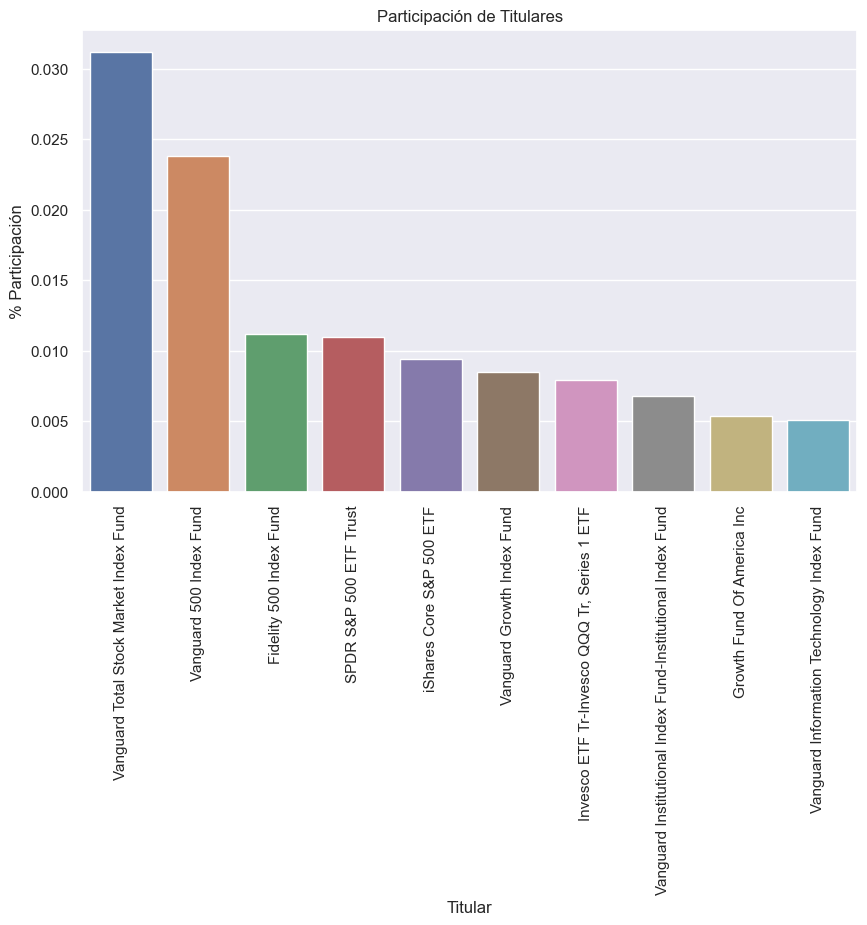

In [40]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Holder', y='% Out', data=mh)
plt.xticks(rotation=90)
plt.xlabel('Titular')
plt.ylabel('% Participación')
plt.title('Participación de Titulares')
plt.show()


In [36]:
ih.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Holder         10 non-null     object        
 1   Shares         10 non-null     int64         
 2   Date Reported  10 non-null     datetime64[ns]
 3   % Out          10 non-null     float64       
 4   Value          10 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 528.0+ bytes


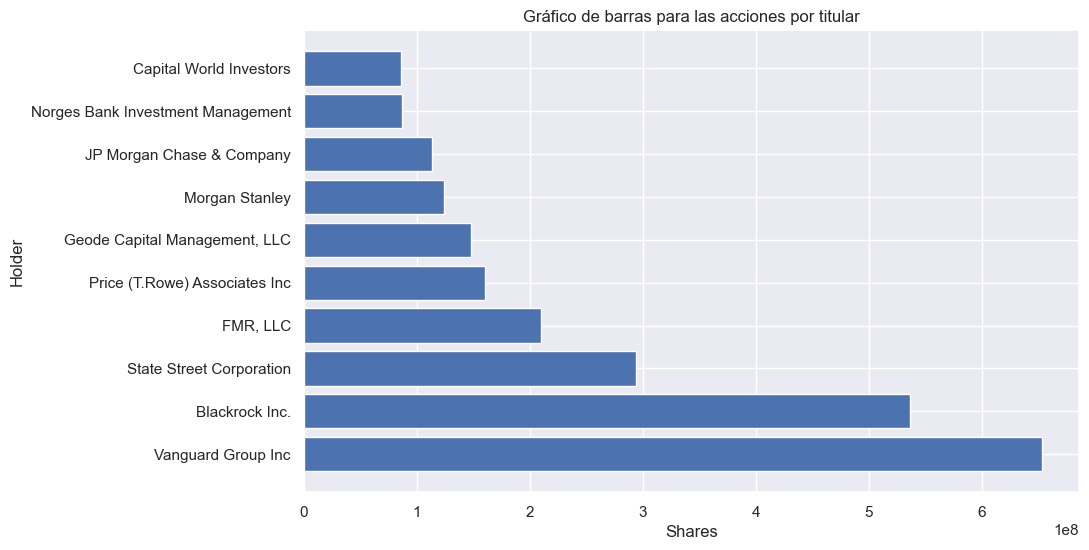

In [33]:
# Gráfico de barras para las acciones por titular
plt.figure(figsize=(10,6))
plt.barh(ih['Holder'], ih['Shares'])
plt.xlabel('Shares')
plt.ylabel('Holder')
plt.title('Gráfico de barras para las acciones por titular')
plt.show()

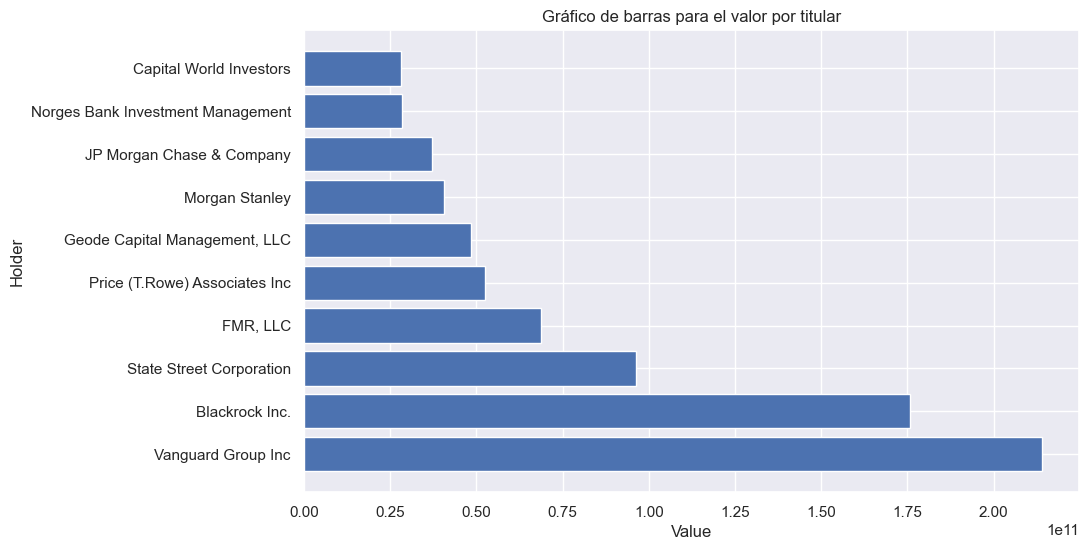

In [34]:
# Gráfico de barras para el valor por titular
plt.figure(figsize=(10,6))
plt.barh(ih['Holder'], ih['Value'])
plt.xlabel('Value')
plt.ylabel('Holder')
plt.title('Gráfico de barras para el valor por titular')
plt.show()

In [44]:
mh2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Holder         10 non-null     object        
 1   Shares         10 non-null     int64         
 2   Date Reported  10 non-null     datetime64[ns]
 3   % Out          10 non-null     float64       
 4   Value          10 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 528.0+ bytes


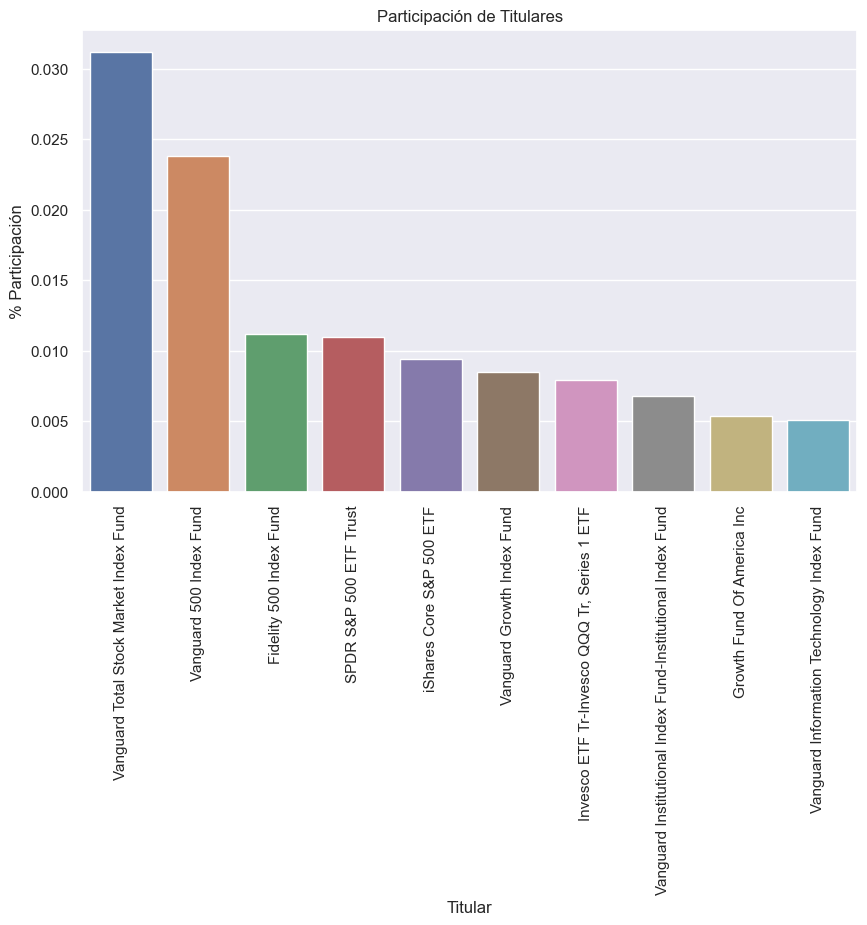

In [47]:
# Gráfico de Barras para las Participaciones (% Out)
plt.figure(figsize=(10, 6))
sns.barplot(x='Holder', y='% Out', data=mh2)
plt.xticks(rotation=90)
plt.xlabel('Titular')
plt.ylabel('% Participación')
plt.title('Participación de Titulares')
plt.show()

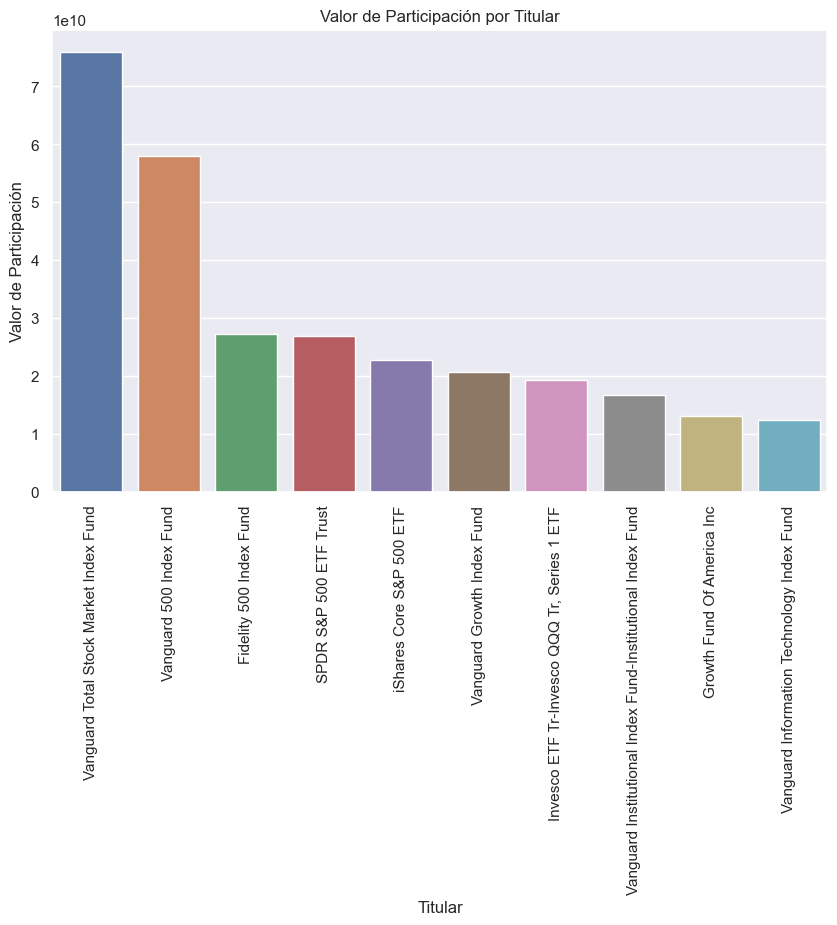

In [49]:
# Gráfico de Barras para Valor de las Participaciones
plt.figure(figsize=(10, 6))
sns.barplot(x='Holder', y='Value', data=mh2, estimator=sum)
plt.xticks(rotation=90)
plt.xlabel('Titular')
plt.ylabel('Valor de Participación')
plt.title('Valor de Participación por Titular')
plt.show()